# Summary

* For this analysis the OpenWeatherMap API key was used along with citipy to find the different weather parameters (maximum temperature, humidity, cloudiness and wind speed) of random cities within a latitude and longitude range.


* Scatter plot and linear regression model was plotted to find the correlation between the latitude of the cities and the different weather parameters.

In [24]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key

from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

In [25]:
# Empty list for holding the latitude and longitude combinations

lat_lngs = []

# Empty list for holding the cities names

cities = []

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


In [26]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Empty list to fetch the weather data for each city

city_data = []

# Print to logger

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    
    record_count += 1
    
    # Parse the JSON and retrieve data
    
    city_weather = requests.get(city_url).json()
    
    # If an error is experienced, skip the city
    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country and date
    
    try:
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']    
    
        # Append the City information into city_data list
    
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete 

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 1 | acarau
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | muisne
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | joaima
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | bathsheba
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | ibra
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | jiexiu
Processing Record 14 of Set 1 | kapuskasing
Processing Record 15 of Set 1 | waiuku
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | sobolevo
Processing Record 19 of Set 1 | praia da vitoria
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | butaritari
Processing Record 22

City not found. Skipping...
Processing Record 41 of Set 4 | marshall
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | adrar
Processing Record 45 of Set 4 | qitaihe
Processing Record 46 of Set 4 | tutoia
Processing Record 47 of Set 4 | avarua
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | ixtapa
Processing Record 0 of Set 5 | songjianghe
Processing Record 1 of Set 5 | kowary
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | tay ninh
Processing Record 4 of Set 5 | port loko
Processing Record 5 of Set 5 | haibowan
City not found. Skipping...
Processing Record 6 of Set 5 | challans
Processing Record 7 of Set 5 | finote selam
Processing Record 8 of Set 5 | sofiysk
City not found. Skipping...
Processing Record 9 of Set 5 | katsuura
Processing Record 10 of Set 5 | bandiagara
Processing Record 11 of Set 5 | baglung
Processing Record 12 of Set 5 | shaunavon
Processi

Processing Record 28 of Set 8 | kavaratti
Processing Record 29 of Set 8 | wanaka
Processing Record 30 of Set 8 | mehamn
Processing Record 31 of Set 8 | fayaoue
Processing Record 32 of Set 8 | owase
Processing Record 33 of Set 8 | monte patria
Processing Record 34 of Set 8 | bairiki
Processing Record 35 of Set 8 | grand gaube
Processing Record 36 of Set 8 | tacoronte
Processing Record 37 of Set 8 | balabac
Processing Record 38 of Set 8 | riyadh
Processing Record 39 of Set 8 | kuytun
Processing Record 40 of Set 8 | tadine
Processing Record 41 of Set 8 | pangnirtung
Processing Record 42 of Set 8 | brae
Processing Record 43 of Set 8 | falealupo
City not found. Skipping...
Processing Record 44 of Set 8 | killorglin
Processing Record 45 of Set 8 | nargana
Processing Record 46 of Set 8 | nioro
Processing Record 47 of Set 8 | kearney
Processing Record 48 of Set 8 | qaqortoq
Processing Record 49 of Set 8 | adamas
Processing Record 0 of Set 9 | diamantina
Processing Record 1 of Set 9 | bandundu


Processing Record 19 of Set 12 | banda aceh
Processing Record 20 of Set 12 | cap-aux-meules
Processing Record 21 of Set 12 | gari
Processing Record 22 of Set 12 | loudon
Processing Record 23 of Set 12 | banjar
Processing Record 24 of Set 12 | pacific grove
Processing Record 25 of Set 12 | ararat
Processing Record 26 of Set 12 | macomer
Processing Record 27 of Set 12 | gat
Processing Record 28 of Set 12 | esmeraldas
Processing Record 29 of Set 12 | hvammstangi
City not found. Skipping...
Processing Record 30 of Set 12 | antofagasta
Processing Record 31 of Set 12 | dawlatabad
Processing Record 32 of Set 12 | berlevag
Processing Record 33 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 34 of Set 12 | mogadishu
Processing Record 35 of Set 12 | nenton
Processing Record 36 of Set 12 | ufimskiy
Processing Record 37 of Set 12 | dunnville
Processing Record 38 of Set 12 | kitob
Processing Record 39 of Set 12 | sembakung
Processing Record 40 of Set 12 | shelburne
Processing Rec

In [28]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data, columns = ['City', 'Lat', 'Lng', 'Max Temp', 
                                                  'Humidity', 'Cloudiness', 'Wind Speed', 
                                                  'Country', 'Date'])

city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [29]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,acarau,-2.8856,-40.1200,26.59,78,100,6.29,BR,1673051986
1,tasiilaq,65.6145,-37.6368,-7.91,69,100,3.05,GL,1673051987
2,muisne,0.6000,-80.0333,24.11,81,100,2.93,EC,1673051988
3,rikitea,-23.1203,-134.9692,26.10,72,6,6.19,PF,1673051989
4,joaima,-16.6542,-41.0306,21.77,97,100,0.61,BR,1673051989


In [30]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data

city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acarau,-2.8856,-40.1200,26.59,78,100,6.29,BR,1673051986
1,tasiilaq,65.6145,-37.6368,-7.91,69,100,3.05,GL,1673051987
2,muisne,0.6000,-80.0333,24.11,81,100,2.93,EC,1673051988
3,rikitea,-23.1203,-134.9692,26.10,72,6,6.19,PF,1673051989
4,joaima,-16.6542,-41.0306,21.77,97,100,0.61,BR,1673051989


# Latitude Vs. Temperature

In [76]:
today = pd.to_datetime("now").strftime("%m/%d/%Y")

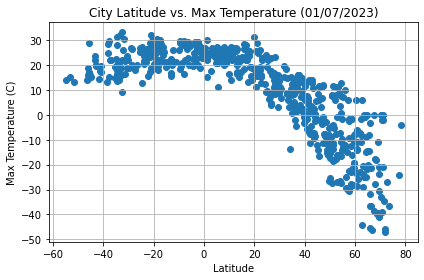

In [77]:
# Scatter plot for latitude vs. temperature

x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values,y_values)

plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.tight_layout()

# Save the figure

plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot

plt.show()

# Latitude Vs. Humidity

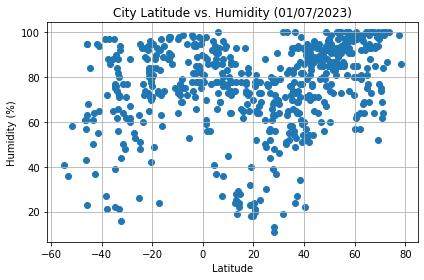

In [79]:
# Scatter plots for latitude vs. humidity

x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values,y_values)

plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

# Save the figure

plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot

plt.show()

# Latitude Vs. Cloudiness

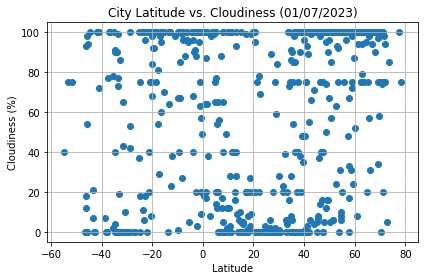

In [80]:
# Scatter plots for latitude vs. cloudiness

x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

# Save the figure

plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot

plt.show()

# Latitude Vs. Wind Speed

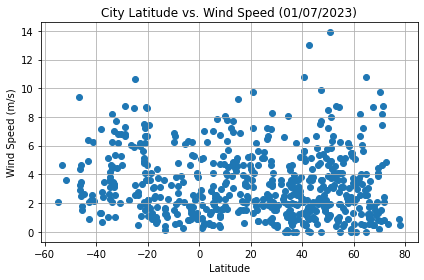

In [81]:
# Scatter plots for latitude vs. wind speed

x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values,y_values)

plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.tight_layout()

# Save the figure

plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Show plot

plt.show()

# Linear Regression for Each Relationship

In [82]:
# DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df =city_data_df[city_data_df["Lat"] >= 0]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tasiilaq,65.6145,-37.6368,-7.91,69,100,3.05,GL,1673051987
2,muisne,0.6000,-80.0333,24.11,81,100,2.93,EC,1673051988
6,bathsheba,13.2167,-59.5167,26.34,78,40,7.72,BB,1673051990
7,torbay,47.6666,-52.7314,-2.46,85,40,3.60,CA,1673051990
8,ibra,22.6906,58.5334,15.27,73,0,0.74,OM,1673051991


In [83]:
# DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df =city_data_df[city_data_df["Lat"] < 0]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acarau,-2.8856,-40.1200,26.59,78,100,6.29,BR,1673051986
3,rikitea,-23.1203,-134.9692,26.10,72,6,6.19,PF,1673051989
4,joaima,-16.6542,-41.0306,21.77,97,100,0.61,BR,1673051989
5,busselton,-33.6500,115.3333,18.48,56,99,4.52,AU,1673051990
12,waiuku,-37.2500,174.7500,22.14,97,100,2.43,NZ,1673051794


# Linear Regression Models

In [94]:
# Define a fuction for linear regression model

def linearregression(x_values, y_values, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    
    # Get regression values

    regress_values = x_values * slope + intercept
    
    # Get the line equation

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create plot

    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label the x axis
    
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    
    # Annotate the line equation
    
    plt.annotate(line_eq, ((min(x_values) + 2), (max(y_values) - 2)), fontsize = 12, color = "red", weight = "bold")
    
    # Print the line eqn and r value

    print(f"The line eqn is: {line_eq}")

    print(f"The r-value is: {rvalue**2}")

# Latitude Vs. Temperature - Northern Hemisphere

The line eqn is: y = -0.78x + 32.78
The r-value is: 0.7340303691442965


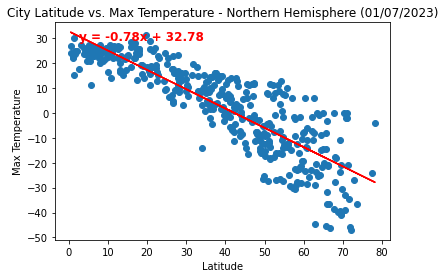

In [95]:
# Define the x_values, y_values and y_label

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

y_label = "Max Temperature"

# Label plot

plt.title(f"City Latitude vs. Max Temperature - Northern Hemisphere ({today})")

# Call the linearregression function

linearregression(x_values, y_values, y_label)

# Save the figure

plt.savefig("output_data/City Latitude vs. Max Temperature - Northern Hemisphere.png")

# Show plot

plt.show()

# Latitude Vs. Temperature - Southern Hemisphere

The line eqn is: y = 0.16x + 25.99
The r-value is: 0.18765553990727257


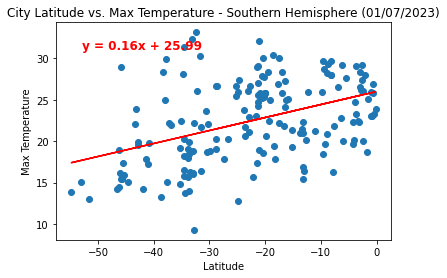

In [96]:
# Define the x_values, y_values and y_label

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

y_label = "Max Temperature"

# Label plot

plt.title(f"City Latitude vs. Max Temperature - Southern Hemisphere ({today})")

# Call the linearregression function

linearregression(x_values, y_values, y_label)

# Save the figure

plt.savefig("output_data/City Latitude vs. Max Temperature - Southern Hemisphere.png")

# Show plot

plt.show()

# Discussion about Linear Relationship of Latitude Vs. Temperature

* Northern Hemisphere

    The linear regression model shows a negative correlation which indicates that as the cities latitude moves away from the equator, the maximum temperature decreases and gets colder.
    
    
* Southern Hemisphere

    The linear regression model shows a positive correlation which indicates that as the cities latitude moves towards the equator, the maximum temperature increases and gets hotter.

# Latitude Vs. Humidity - Northern Hemisphere

The line eqn is: y = 0.4x + 61.24
The r-value is: 0.1582753299919962


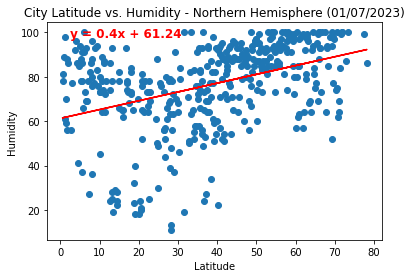

In [97]:
# Define the x_values, y_values and y_label

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

y_label = "Humidity"

# Label plot

plt.title(f"City Latitude vs. Humidity - Northern Hemisphere ({today})")

# Call the linearregression function

linearregression(x_values, y_values, y_label)

# Save the figure

plt.savefig("output_data/City Latitude vs. Humidity - Northern Hemisphere.png")

# Show plot

plt.show()

# Latitude Vs. Humidity - Southern Hemisphere

The line eqn is: y = 0.56x + 87.09
The r-value is: 0.1671358798186903


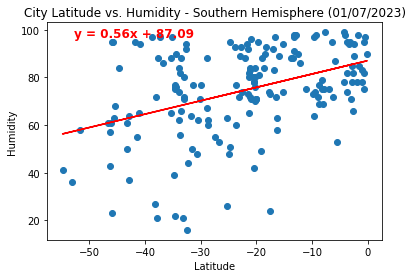

In [98]:
# Define the x_values, y_values and y_label

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

y_label = "Humidity"

# Label plot 

plt.title(f"City Latitude vs. Humidity - Southern Hemisphere ({today})")

# Call the linearregression function

linearregression(x_values, y_values, y_label)

# Save the figure

plt.savefig("output_data/City Latitude vs. Humidity - Southern Hemisphere.png")

# Show plot

plt.show()

# Discussion about Linear Relationship of Latitude Vs. Humidity

* Northern Hemisphere

    No correlation is established between Latitude and Humidity. It can be observed that most of the points are scattered around 100% humidity when moving away from the equator.
    
    
* Southern Hemisphere

    No correlation is established between Latitude and Humidity. It can be observed that most of the points are scattered around 100% humidity when moving towards the equator.

# Latitude Vs. Cloudiness - Northern Hemisphere

The line eqn is: y = 0.87x + 22.03
The r-value is: 0.1646364496708906


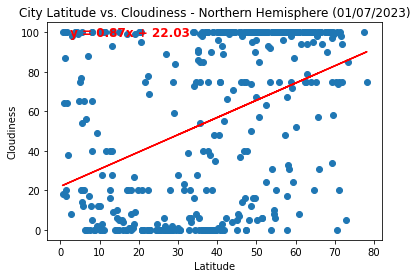

In [99]:
# Define the x_values, y_values and y_label

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

y_label = "Cloudiness"

# Label plot 

plt.title(f"City Latitude vs. Cloudiness - Northern Hemisphere ({today})")

# Call the linearregression function

linearregression(x_values, y_values, y_label)

# Save the figure

plt.savefig("output_data/City Latitude vs. Cloudiness - Northern Hemisphere.png")

# Show plot

plt.show()

# Latitude Vs. Cloudiness - Southern Hemisphere

The line eqn is: y = 1.03x + 84.4
The r-value is: 0.11884929228478716


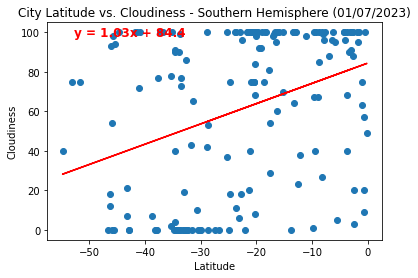

In [100]:
# Define the x_values, y_values and y_label

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

y_label = "Cloudiness"

# Label plot and annotate the line equation

plt.title(f"City Latitude vs. Cloudiness - Southern Hemisphere ({today})")

# Call the linearregression function

linearregression(x_values, y_values, y_label)

# Save the figure

plt.savefig("output_data/City Latitude vs. Cloudiness - Southern Hemisphere.png")

# Show plot

plt.show()

# Discussion about Linear Relationship of Latitude Vs. Cloudiness

* Northern Hemisphere

    No correlation is established between Latitude and Cloudiness. It can be observed that there are times with 100% and 0% cloudiness.
    
    
* Southern Hemisphere

    No correlation is established between Latitude and Cloudiness. It can be observed that more points are scattered at 100% cloudiness.

# Latitude Vs. Wind Speed - Northern Hemisphere

The line eqn is: y = -0.0x + 3.3
The r-value is: 0.0005094503268643113


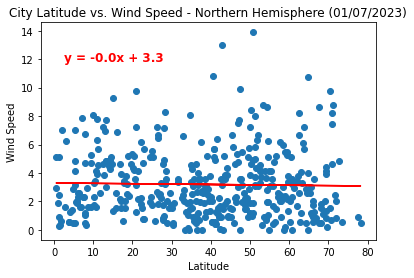

In [101]:
# Define the x_values, y_values and y_label

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

y_label = "Wind Speed"

# Label plot 

plt.title(f"City Latitude vs. Wind Speed - Northern Hemisphere ({today})")

# Call the linearregression function

linearregression(x_values, y_values, y_label)

# Save the figure

plt.savefig("output_data/City Latitude vs. Wind Speed - Northern Hemisphere.png")

# Show plot

plt.show()

# Latitude Vs. Wind Speed - Southern Hemisphere

The line eqn is: y = -0.03x + 2.8
The r-value is: 0.041811611889469275


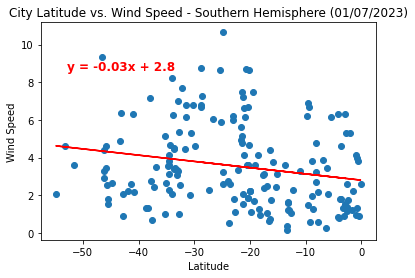

In [102]:
# Define the x_values, y_values and y_label

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

y_label = "Wind Speed"

# Label plot

plt.title(f"City Latitude vs. Wind Speed - Southern Hemisphere ({today})")

# Call the linearregression function

linearregression(x_values, y_values, y_label)

# Save the figure

plt.savefig("output_data/City Latitude vs. Wind Speed - Southern Hemisphere.png")

# Show plot

plt.show()

# Discussion about Linear Relationship of Latitude Vs. Wind Speed

* Northern Hemisphere
    
    No correlation is established between Latitude and Wind Speed. It can be observed that the wind speed is around 0 - 5 m/s.
    
    
* Southern Hemisphere
    
    No correlation is established between Latitude and Wind Speed.